<a href="https://colab.research.google.com/github/AswinK06/Data-Science/blob/main/exp_2(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 1212.70
R-squared (R2): -0.20

Model Coefficients:
Intercept: 39.22
Coefficients: {'Match_ID': 0.13085220503949085, 'Team_A': -1.7385276583122882, 'Team_B': -1.0991638162059163, 'Venue': -1.1010305612842164}
    Actual  Predicted
83     2.0  44.080352
53    40.0  19.356412
70     4.0  39.715546
45     9.0  23.702874
44    87.0  21.478100


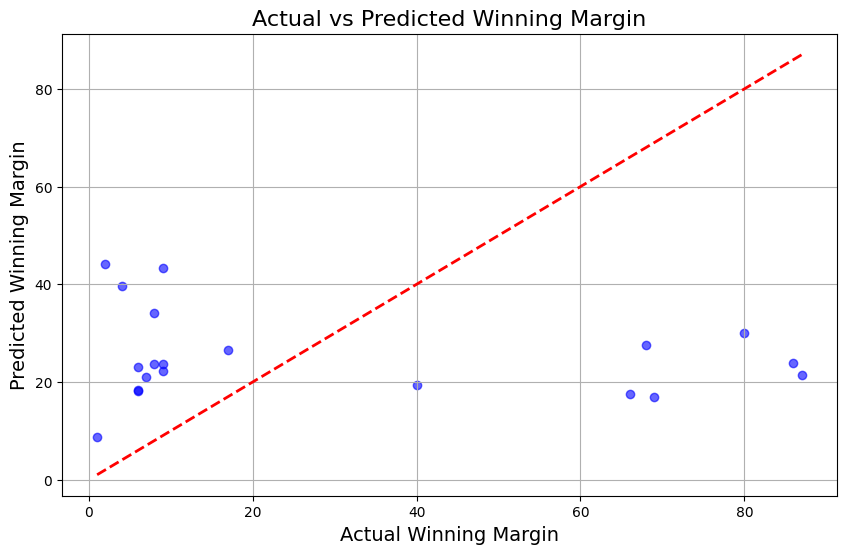

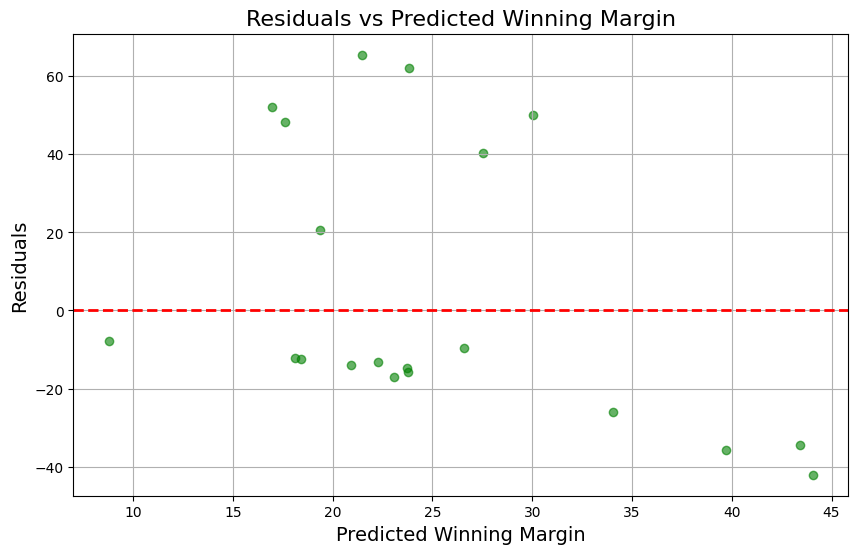

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "/content/ipl_dataset.csv"
df = pd.read_csv(file_path)

def extract_margin(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        return int(match.group()) if match else np.nan
    return np.nan

df['Winning_Margin'] = df['Winning_Margin'].apply(extract_margin)

df['Winning_Margin'] = df['Winning_Margin'].fillna(df['Winning_Margin'].mean())

df['Team_A'] = df['Team_A'].astype('category').cat.codes
df['Team_B'] = df['Team_B'].astype('category').cat.codes
df['Venue'] = df['Venue'].astype('category').cat.codes

X = df[['Match_ID', 'Team_A', 'Team_B', 'Venue']]
y = df['Winning_Margin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Winning Margin', fontsize=16)
plt.xlabel('Actual Winning Margin', fontsize=14)
plt.ylabel('Predicted Winning Margin', fontsize=14)
plt.grid()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Winning Margin', fontsize=16)
plt.xlabel('Predicted Winning Margin', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid()
plt.show()


Class distribution in target variable:
High_Winning_Margin
0    63
1    37
Name: count, dtype: int64
Logistic Regression Model Evaluation:
Accuracy: 0.50

Confusion Matrix:
[[9 4]
 [6 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.20      0.14      0.17         7

    accuracy                           0.50        20
   macro avg       0.40      0.42      0.40        20
weighted avg       0.46      0.50      0.48        20



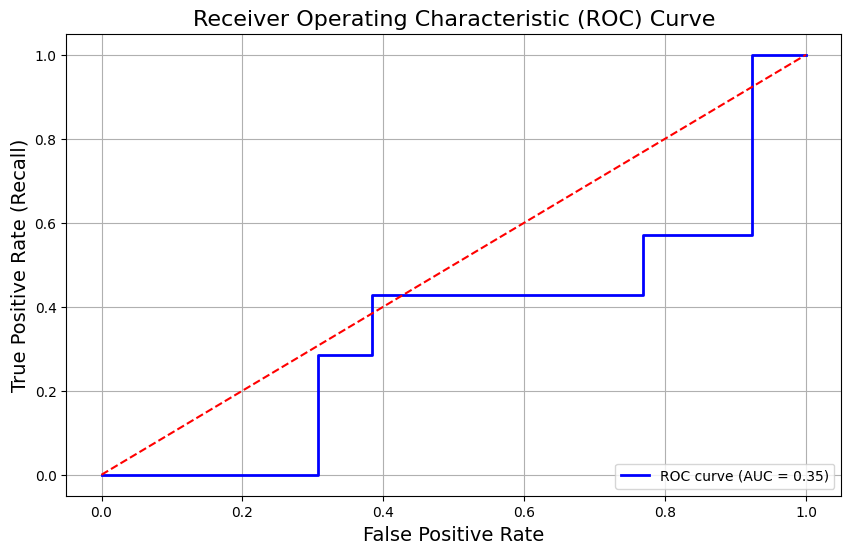

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

file_path = "/content/ipl_dataset.csv"
df = pd.read_csv(file_path)

def extract_margin(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        return int(match.group()) if match else np.nan
    return np.nan

df['Winning_Margin'] = df['Winning_Margin'].apply(extract_margin)

df['Winning_Margin'] = df['Winning_Margin'].fillna(df['Winning_Margin'].mean())

df['Team_A'] = df['Team_A'].astype('category').cat.codes
df['Team_B'] = df['Team_B'].astype('category').cat.codes
df['Venue'] = df['Venue'].astype('category').cat.codes

df['High_Winning_Margin'] = np.where(df['Winning_Margin'] > 20, 1, 0)
print("Class distribution in target variable:")
print(df['High_Winning_Margin'].value_counts())

X = df[['Match_ID', 'Team_A', 'Team_B', 'Venue']]
y = df['High_Winning_Margin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba > 0.4).astype(int)

accuracy = accuracy_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
class_report = classification_report(y_test, y_pred_adjusted, zero_division=1)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate (Recall)', fontsize=14)
plt.legend(loc='lower right')
plt.grid()
plt.show()


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 957.04
R-squared (R2): 0.72

Model Coefficients:
Intercept: 1131.34
Coefficients: {'Type': -97.75010087415627, 'Country': 0.11398276824002535, 'release_year': -0.5125294308619877, 'Listed_in': 0.08046983408907654}


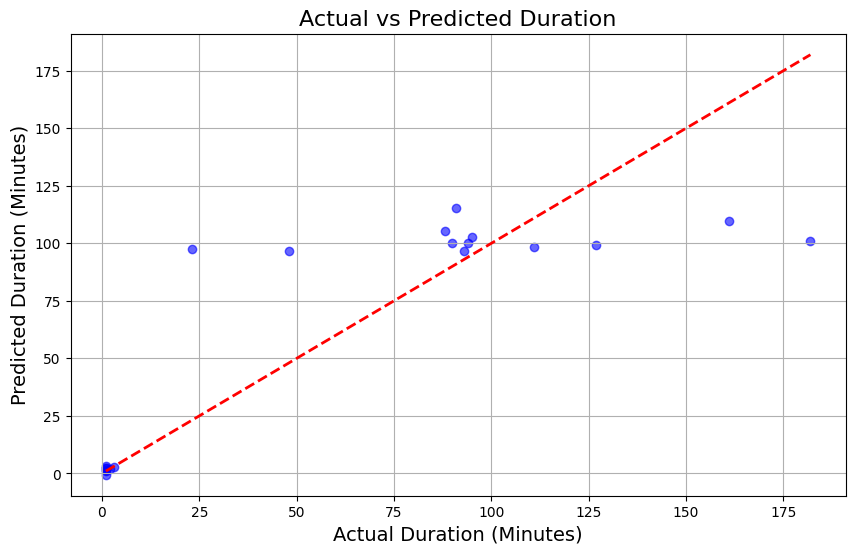

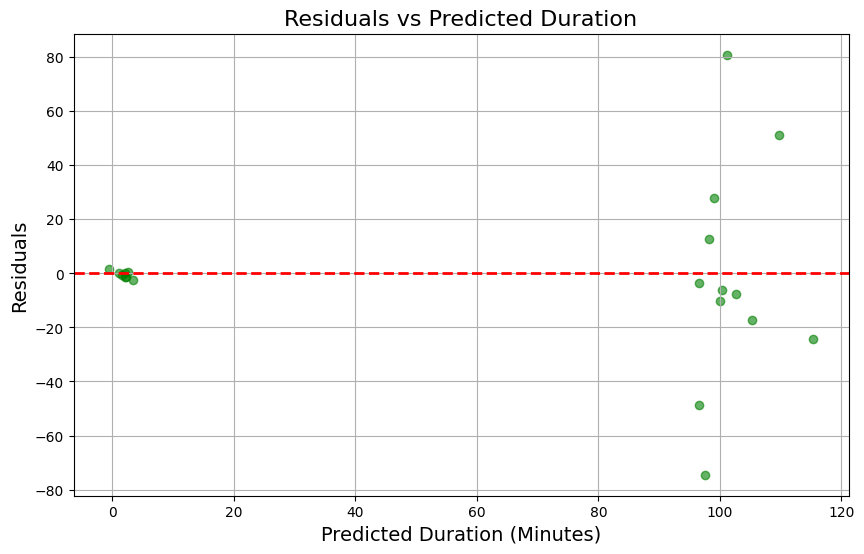

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "/content/netflix.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet2")

def extract_duration(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        return int(match.group()) if match else np.nan
    return np.nan

df['Duration_Minutes'] = df['duration'].apply(extract_duration)

df['Duration_Minutes'] = df['Duration_Minutes'].fillna(df['Duration_Minutes'].mean())

df['Type'] = df['type'].astype('category').cat.codes
df['Country'] = df['country'].astype('category').cat.codes
df['Listed_in'] = df['listed_in'].astype('category').cat.codes

X = df[['Type', 'Country', 'release_year', 'Listed_in']]
y = df['Duration_Minutes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Duration', fontsize=16)
plt.xlabel('Actual Duration (Minutes)', fontsize=14)
plt.ylabel('Predicted Duration (Minutes)', fontsize=14)
plt.grid()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Duration', fontsize=16)
plt.xlabel('Predicted Duration (Minutes)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid()
plt.show()

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 2961.03
R-squared (R2): 0.12

Model Coefficients:
Intercept: 4830.78
Coefficients: {'release_year': -2.369084331633258}


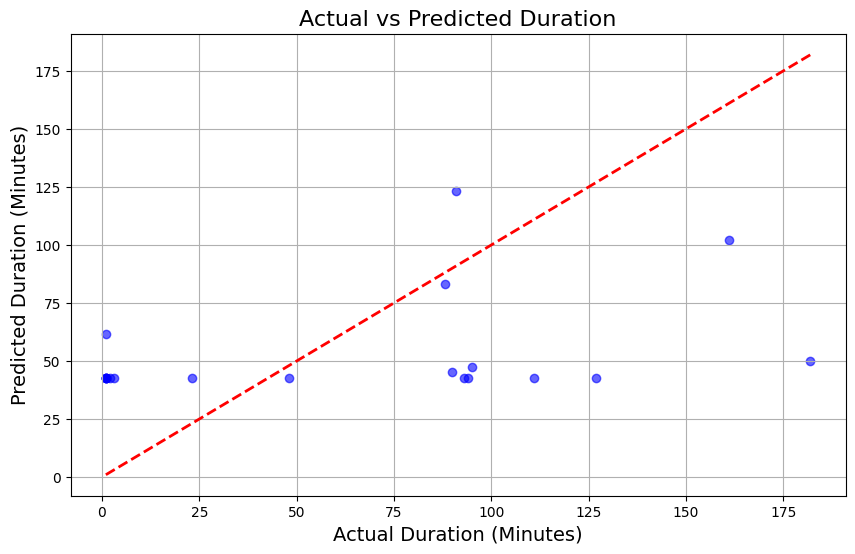

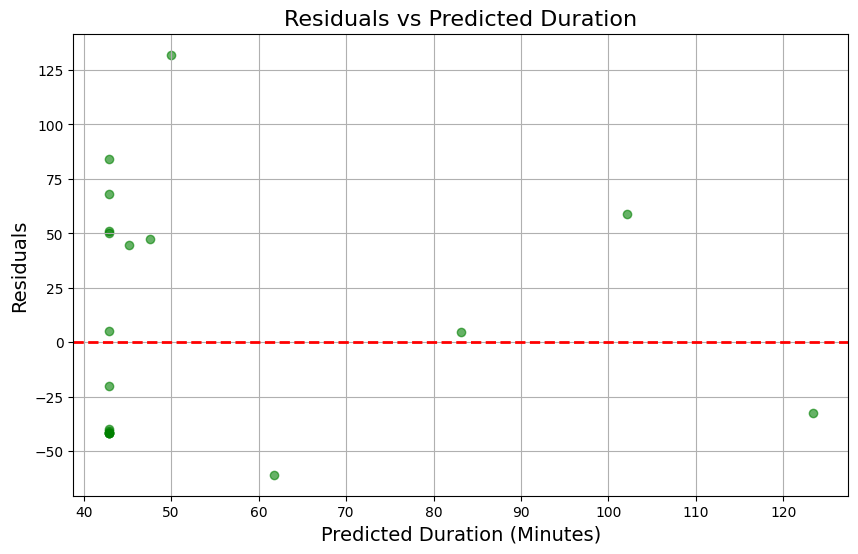

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "/content/netflix.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet2")

def extract_duration(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        return int(match.group()) if match else np.nan
    return np.nan

df['Duration_Minutes'] = df['duration'].apply(extract_duration)

df['Duration_Minutes'] = df['Duration_Minutes'].fillna(df['Duration_Minutes'].mean())

df['Type'] = df['type'].astype('category').cat.codes
df['Country'] = df['country'].astype('category').cat.codes
df['Listed_in'] = df['listed_in'].astype('category').cat.codes

X = df[[ 'release_year']]
y = df['Duration_Minutes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Duration', fontsize=16)
plt.xlabel('Actual Duration (Minutes)', fontsize=14)
plt.ylabel('Predicted Duration (Minutes)', fontsize=14)
plt.grid()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Duration', fontsize=16)
plt.xlabel('Predicted Duration (Minutes)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid()
plt.show()

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 2961.03
R-squared (R2): 0.12

Model Coefficients:
Intercept: 4830.78
Coefficients: {'release_year': -2.369084331633258}


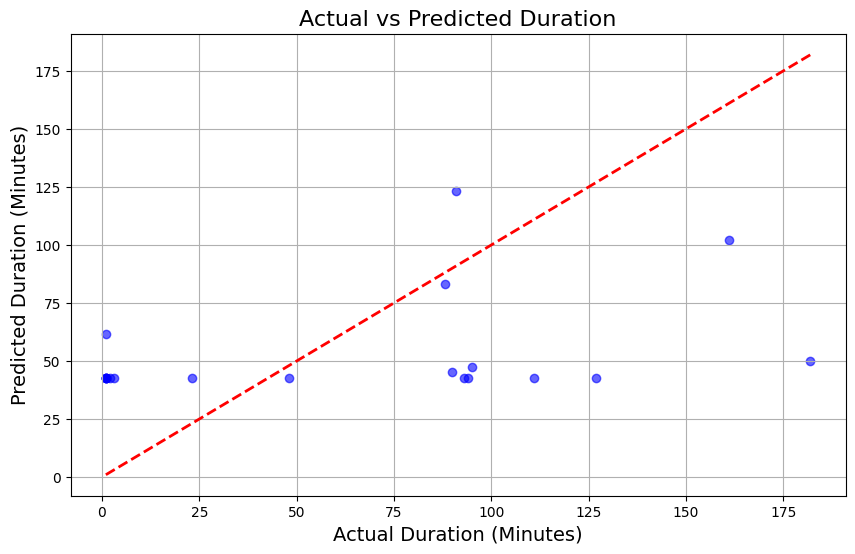

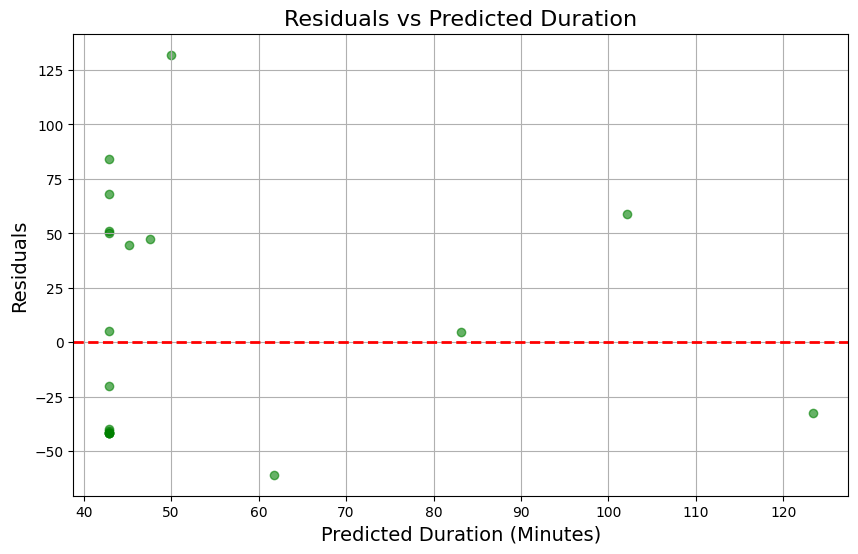

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "/content/netflix.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet2")

def extract_duration(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        return int(match.group()) if match else np.nan
    return np.nan

df['Duration_Minutes'] = df['duration'].apply(extract_duration)

df['Duration_Minutes'] = df['Duration_Minutes'].fillna(df['Duration_Minutes'].mean())

df['Type'] = df['type'].astype('category').cat.codes
df['Country'] = df['country'].astype('category').cat.codes
df['Listed_in'] = df['listed_in'].astype('category').cat.codes

X = df[[ 'release_year']]
y = df['Duration_Minutes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: {dict(zip(X.columns, model.coef_))}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Duration', fontsize=16)
plt.xlabel('Actual Duration (Minutes)', fontsize=14)
plt.ylabel('Predicted Duration (Minutes)', fontsize=14)
plt.grid()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Duration', fontsize=16)
plt.xlabel('Predicted Duration (Minutes)', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid()
plt.show()
